<center>
    <h1><b>Support Vector Machine</b></h1>
    --------------------------
</center>

In [16]:
# importation of libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# dataset features
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target

In [10]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df['target'].unique()

array([0, 1, 2])

In [13]:
df.shape

(150, 5)

In [14]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [15]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
# creating 3 dataframes from the main dataframe
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

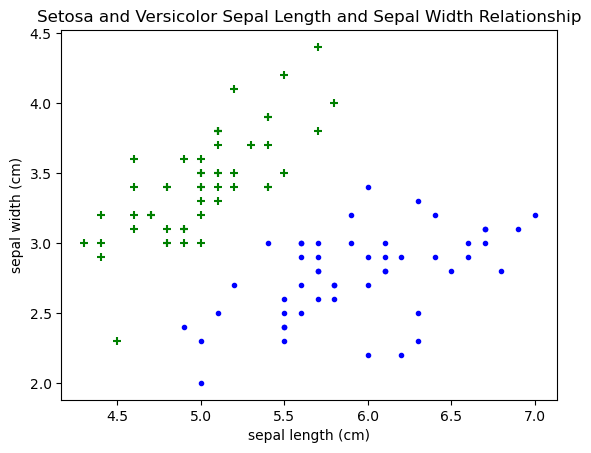

In [24]:
# Scatter plot for df0, df1 sepal length and df0, df1 sepal width
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Setosa and Versicolor Sepal Length and Sepal Width Relationship')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'b', marker = '.');

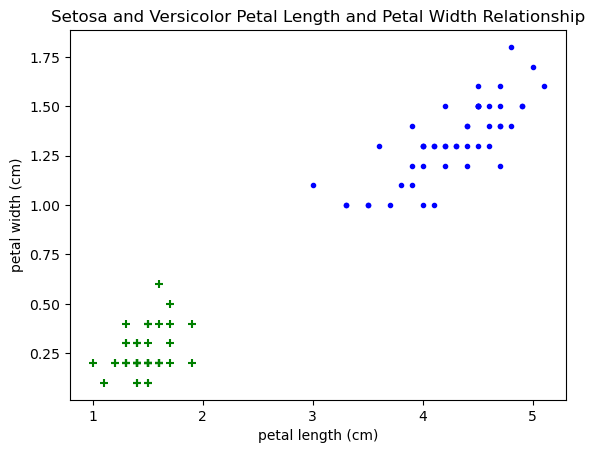

In [29]:
# Scatter plot for df0, df1 Petal length and df0, df1 sepal width
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Setosa and Versicolor Petal Length and Petal Width Relationship')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'g', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'b', marker = '.');

### Model Building

In [37]:
# libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  # support vector classifier

In [31]:
# dropping columns that will not be included in X features
X = df.drop(columns = ['target', 'flower_name'], axis = '1')
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [32]:
# Selecting the target variable
y = df['target']
y.head(2)

0    0
1    0
Name: target, dtype: int32

In [43]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [44]:
# Sizes of splits
len(X_train), len(X_test)

(120, 30)

In [64]:
# model training
model =  SVC(kernel = 'linear')  # Regularisation parameters: C= 1 ..., gamma =10 ..., kernel='rbf', 'linear', 'poly', etc
model.fit(X_train, y_train)

SVC(kernel='linear')

In [65]:
model.score(X_test, y_test)

0.9666666666666667

In [66]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %mamba  %matplotlib  %micromamba  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex 